
## Multi-Input Time Series and ensembles


In [1]:

from sktime.forecasting.compose import EnsembleForecaster
from sklearn.svm import SVR
from sktime.transformations.series.detrend import ConditionalDeseasonalizer
from sktime.datasets import load_macroeconomic


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



import warnings
## warnings.filterwarnings('ignore')
from statsmodels.tsa.api import seasonal_decompose, adfuller


In [3]:

import sktime
import statsmodels as sm
import matplotlib 
import sklearn

from sklearn.linear_model import( LinearRegression, 
                                 ElasticNet, 
                                 Ridge, 
                                 Lasso, 
                                 HuberRegressor)


from sktime.performance_metrics.forecasting import(MeanAbsolutePercentageError, 
                                                   MeanSquaredError, 
                                                   MeanAbsoluteScaledError)

from statsmodels.graphics.tsaplots import plot_acf


In [4]:

from sklearn.ensemble import (RandomForestRegressor, 
                              GradientBoostingRegressor, 
                              ExtraTreesRegressor)


from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor


In [5]:

from sktime.transformations.series.detrend import Deseasonalizer
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError as mape
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.model_selection import temporal_train_test_split

from sktime.transformations.series.detrend import Detrender
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.performance_metrics.forecasting import mean_squared_percentage_error as mspe
from sktime.performance_metrics.forecasting import mean_squared_error as mse
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error as  mase 


In [6]:

from sktime.forecasting.compose import make_reduction


In [7]:

from sktime.forecasting.model_selection import ForecastingGridSearchCV
from sktime.split import                  SlidingWindowSplitter
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError


In [8]:

load_macroeconomic().shape


(203, 12)

In [9]:

load_macroeconomic()


,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
Period,,,,,,,,,,,,
1959Q1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71


In [10]:

econ = load_macroeconomic()

cols = ['realgdp','realdpi','tbilrate', 'unemp', 'infl']

econ_df = econ[cols]


In [11]:

econ_df.shape


(203, 5)

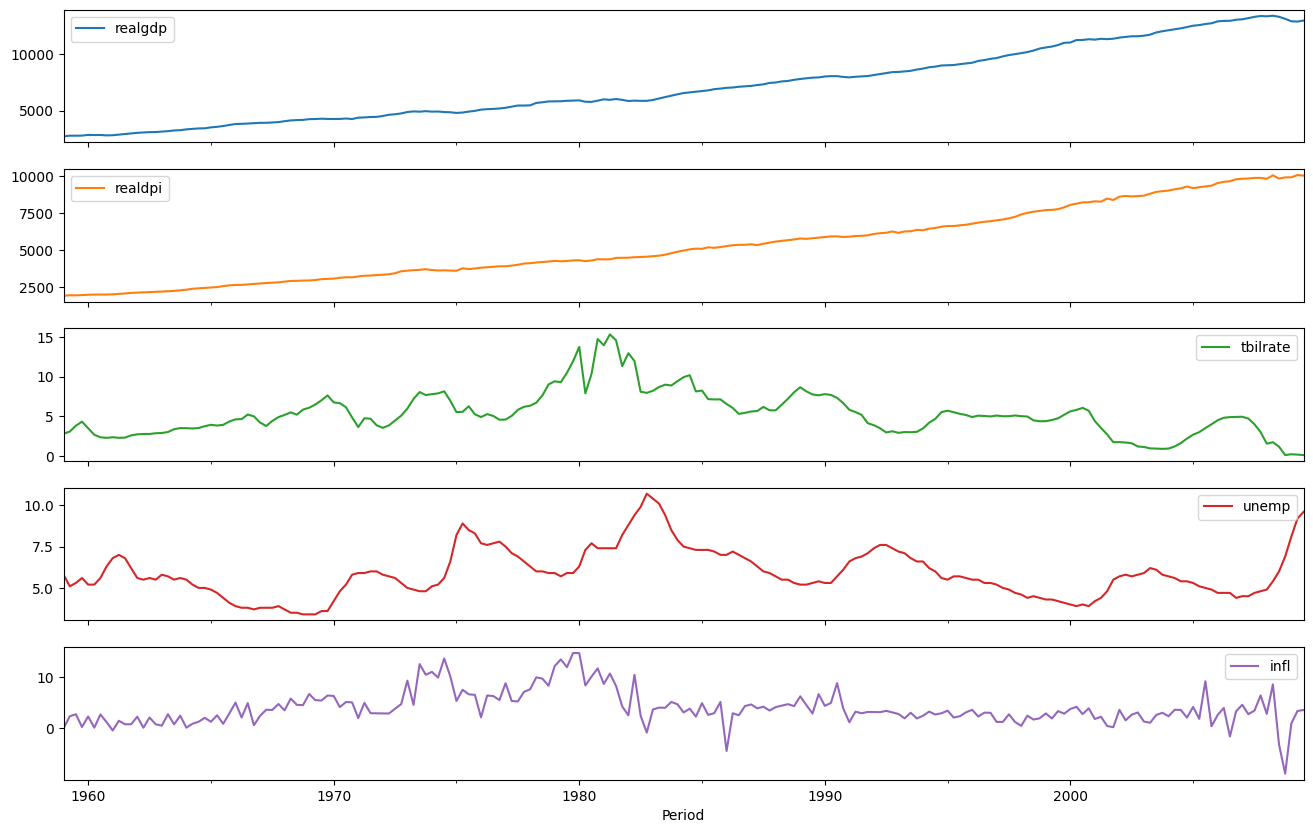

In [12]:

econ_df.plot(subplots=True, figsize=(16, 10));plt.show()


In [13]:

econ_df.head()


,realgdp,realdpi,tbilrate,unemp,infl
Period,,,,,
1959Q1,2710.349,1886.9,2.82,5.8,0.00
1959Q2,2778.801,1919.7,3.08,5.1,2.34
1959Q3,2775.488,1916.4,3.82,5.3,2.74
1959Q4,2785.204,1931.3,4.33,5.6,0.27
1960Q1,2847.699,1955.5,3.50,5.2,2.31


In [14]:

print(econ_df.index.freq)


<QuarterEnd: startingMonth=12>


In [15]:

cond_deseason = ConditionalDeseasonalizer(sp=4)
detrend       = Detrender(forecaster=PolynomialTrendForecaster(degree=1))

for col in econ_df:
    econ_df[col] = cond_deseason.fit_transform( econ_df[col] )
    econ_df[col] = detrend.fit_transform(       econ_df[col] )


/var/folders/q4/zdsjyw0d297_fn6_fh5n7g9h0000gn/T/ipykernel_2361/2014303376.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  econ_df[col] = cond_deseason.fit_transform( econ_df[col] )
/var/folders/q4/zdsjyw0d297_fn6_fh5n7g9h0000gn/T/ipykernel_2361/2014303376.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  econ_df[col] = detrend.fit_transform(       econ_df[col] )
/var/folders/q4/zdsjyw0d297_fn6_fh5n7g9h0000gn/T/ipykernel_2361/2014303376.py:5: SettingWithCopyWarning: 
A value is trying to be set on a c

In [16]:

y    = econ_df['unemp']
exog = econ_df.drop(columns=['unemp'])


In [17]:

y


1959Q1    0.019981
1959Q2   -0.682073
1959Q3   -0.477137
1959Q4   -0.178195
1960Q1   -0.584254
            ...   
2008Q3    0.015321
2008Q4    0.914262
2009Q1    2.108203
2009Q2    3.206149
2009Q3    3.611085
Freq: Q-DEC, Name: unemp, Length: 203, dtype: float64

In [18]:

exog


,realgdp,realdpi,tbilrate,infl
1959Q1,935.499291,688.616981,-3.326594,-4.649796
1959Q2,941.129724,675.700479,-3.024784,-2.535008
1959Q3,885.348453,635.349564,-2.347751,-2.162302
1959Q4,846.376673,606.895231,-1.800005,-4.257355
1960Q1,857.340214,594.458648,-2.613408,-2.308508
...,...,...,...,...
2008Q3,874.515644,582.091265,-3.371671,-6.529231
2008Q4,643.147864,620.836932,-4.383925,-11.784284
2009Q1,375.106405,590.200349,-4.267328,-2.145437
2009Q2,288.378838,695.583847,-4.265519,0.059350


In [19]:

len(econ_df)*0.1


20.3

In [20]:

def split_data(df, test_split=0.15):
    n = int(len(df) * test_split)
    train, test = df[:-n], df[-n:]
    return train, test


In [21]:

test_size = 0.1

y_train, y_test       = split_data(y,    test_split=test_size)

exog_train, exog_test = split_data(exog, test_split=test_size)


In [22]:

regressors = [
    ("LinearRegression", make_reduction(LinearRegression())),
    ("RandomForest", make_reduction(RandomForestRegressor())),
    ("SupportVectorRegressor", make_reduction(SVR())),
    ("GradientBoosting", make_reduction(GradientBoostingRegressor()))
]


In [23]:

ensemble = EnsembleForecaster(regressors)
naive    = NaiveForecaster()


In [24]:

ensemble.fit(y=y_train, X=exog_train)
naive.fit(   y=y_train, X=exog_train)


NaiveForecaster()

In [25]:

fh = ForecastingHorizon(y_test.index, is_relative=None)

y_hat = pd.DataFrame(y_test).rename(columns={'unemp': 'test'})



In [26]:

y_hat['EnsembleForecaster'] = ensemble.predict(fh=fh, X=exog_test)
y_hat['NaiveForecaster']    = naive.predict(   fh=fh, X=exog_test)


/Users/user/opt/anaconda3/envs/py39_time_series/lib/python3.9/site-packages/sktime/forecasting/compose/_ensemble.py:367: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  y_pred = y_pred.groupby(level=1, axis=1).agg(


In [27]:

y_hat.rename(columns={'test':'y'}, inplace=True)


In [28]:

def evaluate(df, train, sort_by='MASE'):
    evals = pd.DataFrame(index=['sMAPE', 'MAPE', 'RMSE'])
    y_truth = df['y']
    y_predicted = df.drop(columns=['y'])
    for p in y_predicted:
        evals.loc['sMAPE', p] = mape(y_truth, y_predicted[p], symmetric=True)
        evals.loc['MAPE', p] = mape(y_truth, y_predicted[p], symmetric=False)
        evals.loc['RMSE', p] = np.sqrt(mse(y_truth, y_predicted[p]))
        evals.loc['MASE', p] = mase(y_truth, y_predicted[p], y_train=train)
    return evals.T.sort_values(by=sort_by)


In [29]:

evaluate(y_hat, y_train)


,sMAPE,MAPE,RMSE,MASE
NaiveForecaster,MeanAbsolutePercentageError(multilevel=2004Q4 ...,MeanAbsolutePercentageError(multilevel=2004Q4 ...,1.537844,4.522654
EnsembleForecaster,MeanAbsolutePercentageError(multilevel=2004Q4 ...,MeanAbsolutePercentageError(multilevel=2004Q4 ...,1.361664,4.560261


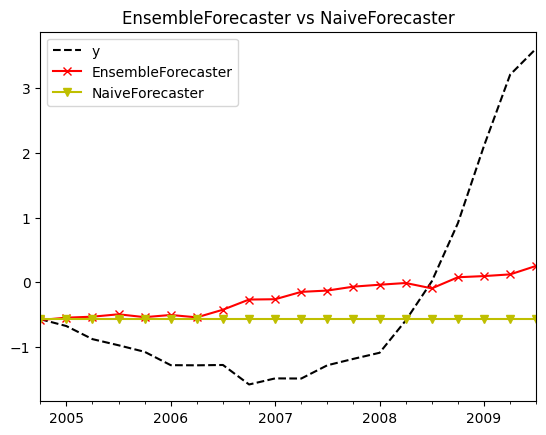

In [30]:

styles = ['k--','rx-','yv-']

for col, s in zip(y_hat, styles):
    y_hat[col].plot(style=s, label=col, 
                    title='EnsembleForecaster vs NaiveForecaster')
plt.legend()
#plt.savefig('../../../Packt-Time-Series-Cookbook/Chapters/Ch12/images/fig_12.18.png', bbox_inches='tight', dpi=600)



In [31]:

regressors


[('LinearRegression',
  RecursiveTabularRegressionForecaster(estimator=LinearRegression())),
 ('RandomForest',
  RecursiveTabularRegressionForecaster(estimator=RandomForestRegressor())),
 ('SupportVectorRegressor',
  RecursiveTabularRegressionForecaster(estimator=SVR())),
 ('GradientBoosting',
  RecursiveTabularRegressionForecaster(estimator=GradientBoostingRegressor()))]

In [32]:

from sktime.forecasting.compose import AutoEnsembleForecaster

auto = AutoEnsembleForecaster(forecasters=regressors,
                             method='feature-importance')
auto.fit(y=y_train, X=exog_train)


AutoEnsembleForecaster(forecasters=[('LinearRegression',
                                     RecursiveTabularRegressionForecaster(estimator=LinearRegression())),
                                    ('RandomForest',
                                     RecursiveTabularRegressionForecaster(estimator=RandomForestRegressor())),
                                    ('SupportVectorRegressor',
                                     RecursiveTabularRegressionForecaster(estimator=SVR())),
                                    ('GradientBoosting',
                                     RecursiveTabularRegressionForecaster(estimator=GradientBoostingRegressor()))])

In [33]:

auto.weights_


[0.08399935300762486,
 0.35646101009706777,
 0.17709166836693305,
 0.38244796852837426]

In [34]:

y_hat['AutoEnsembleForecaster'] = auto.predict(fh=fh, X=exog_test)


In [35]:

evaluate(y_hat, y_train)


,sMAPE,MAPE,RMSE,MASE
NaiveForecaster,MeanAbsolutePercentageError(multilevel=2004Q4 ...,MeanAbsolutePercentageError(multilevel=2004Q4 ...,1.537844,4.522654
EnsembleForecaster,MeanAbsolutePercentageError(multilevel=2004Q4 ...,MeanAbsolutePercentageError(multilevel=2004Q4 ...,1.361664,4.560261
AutoEnsembleForecaster,MeanAbsolutePercentageError(multilevel=2004Q4 ...,MeanAbsolutePercentageError(multilevel=2004Q4 ...,1.432568,4.709354



## CIVS DATA


In [80]:
'''
ts_data = pd.read_csv(
            'data/RealSeqData.CIVS.Nov.2023.csv',
            header=0,
            parse_dates = ['time'],
            index_col=0,
            infer_datetime_format=True
)
'''

"\nts_data = pd.read_csv(\n            'data/RealSeqData.CIVS.Nov.2023.csv',\n            header=0,\n            parse_dates = ['time'],\n            index_col=0,\n            infer_datetime_format=True\n)\n"

In [81]:
'''
ts_data = pd.read_csv(
                          'data/RealSeqData.CIVS.Nov.2023.csv', 
                          index_col='time', 
                          parse_dates=True,
                          usecols=['time', 'o_SILICON_14']
)
'''

my_cols = ['time', 'NAT_GAS_INJECTION','i_COLD_BLAST_MOISTURE',  'o_SILICON_14', 'i_HOT_BLAST_PRESSURE']

ts_data = pd.read_csv(
                          'data/RealSeqData.CIVS.Nov.2023.csv', 
                          index_col='time', 
                          parse_dates=True,
                          usecols=my_cols
)


/var/folders/q4/zdsjyw0d297_fn6_fh5n7g9h0000gn/T/ipykernel_2361/365482435.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ts_data = pd.read_csv(


In [82]:

ts_data.head(10)


,i_COLD_BLAST_MOISTURE,NAT_GAS_INJECTION,i_HOT_BLAST_PRESSURE,o_SILICON_14
time,,,,
2021-08-01 00:00:00,4.997585,4034.234339,34.357590,0.776
2021-08-01 00:01:00,5.000531,4024.947376,34.328821,0.776
2021-08-01 00:02:00,5.003476,4011.601682,34.300052,0.776
2021-08-01 00:03:00,5.006422,4012.024633,34.271282,0.776
2021-08-01 00:04:00,5.009368,4000.467204,34.242513,0.776
2021-08-01 00:05:00,5.012314,3997.553600,34.213744,0.776
2021-08-01 00:06:00,5.015259,4029.213402,34.184975,0.776
2021-08-01 00:07:00,5.018205,4041.618733,34.156205,0.776
2021-08-01 00:08:00,5.021151,4036.835631,34.132756,0.776


In [85]:

## makes sure values are in order 

ts_data.sort_index( inplace = True)

## ts_data.interpolate(inplace = True) 

## ts_data.infer_freq


In [86]:

print(ts_data.index.freq)


None


In [87]:
'''
df = ts_data

pd.date_range(df.index.min(), df.index.max(), freq='min').difference(df.index)


## DatetimeIndex(['2019-09-17'], dtype='datetime64[ns]', freq=None)
'''

"\ndf = ts_data\n\npd.date_range(df.index.min(), df.index.max(), freq='min').difference(df.index)\n\n\n## DatetimeIndex(['2019-09-17'], dtype='datetime64[ns]', freq=None)\n"

In [88]:

ts_data = ts_data.resample('min').first()

## ts_data.index.freq = 'S' ## 'min'


In [89]:

print(ts_data.index.freq)


<Minute>


In [90]:

ts_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 264960 entries, 2021-08-01 00:00:00 to 2022-01-31 23:59:00
Freq: T
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   i_COLD_BLAST_MOISTURE  264960 non-null  float64
 1   NAT_GAS_INJECTION      264960 non-null  float64
 2   i_HOT_BLAST_PRESSURE   264960 non-null  float64
 3   o_SILICON_14           264960 non-null  float64
dtypes: float64(4)
memory usage: 10.1 MB


In [91]:

print(ts_data.index.freq)


<Minute>


In [92]:

ts_data.head(10)


,i_COLD_BLAST_MOISTURE,NAT_GAS_INJECTION,i_HOT_BLAST_PRESSURE,o_SILICON_14
time,,,,
2021-08-01 00:00:00,4.997585,4034.234339,34.357590,0.776
2021-08-01 00:01:00,5.000531,4024.947376,34.328821,0.776
2021-08-01 00:02:00,5.003476,4011.601682,34.300052,0.776
2021-08-01 00:03:00,5.006422,4012.024633,34.271282,0.776
2021-08-01 00:04:00,5.009368,4000.467204,34.242513,0.776
2021-08-01 00:05:00,5.012314,3997.553600,34.213744,0.776
2021-08-01 00:06:00,5.015259,4029.213402,34.184975,0.776
2021-08-01 00:07:00,5.018205,4041.618733,34.156205,0.776
2021-08-01 00:08:00,5.021151,4036.835631,34.132756,0.776


array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>], dtype=object)

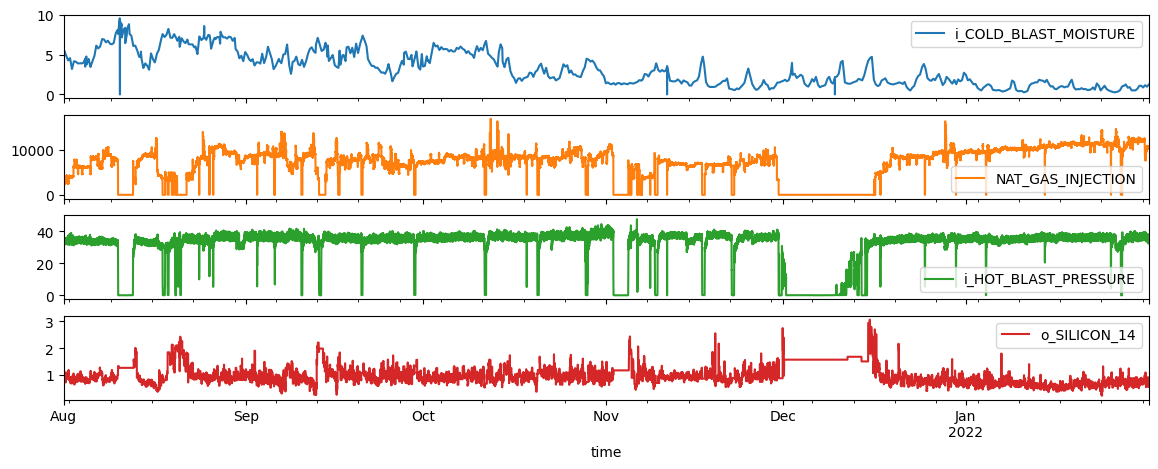

In [93]:


ts_data.plot( figsize=(14,5),  subplots=True   )


In [94]:

ts_data.shape


(264960, 4)

In [95]:


cols = ['NAT_GAS_INJECTION','i_COLD_BLAST_MOISTURE', 'i_HOT_BLAST_PRESSURE', 'o_SILICON_14']

civs_df = ts_data[cols]


In [96]:

civs_df.shape


(264960, 4)

In [97]:

civs_df


,NAT_GAS_INJECTION,i_COLD_BLAST_MOISTURE,i_HOT_BLAST_PRESSURE,o_SILICON_14
time,,,,
2021-08-01 00:00:00,4034.234339,4.997585,34.357590,0.776
2021-08-01 00:01:00,4024.947376,5.000531,34.328821,0.776
2021-08-01 00:02:00,4011.601682,5.003476,34.300052,0.776
2021-08-01 00:03:00,4012.024633,5.006422,34.271282,0.776
2021-08-01 00:04:00,4000.467204,5.009368,34.242513,0.776
...,...,...,...,...
2022-01-31 23:55:00,10228.289380,1.215443,35.796520,0.547
2022-01-31 23:56:00,10258.770660,1.216066,35.867555,0.547
2022-01-31 23:57:00,10241.841990,1.216689,35.950116,0.547


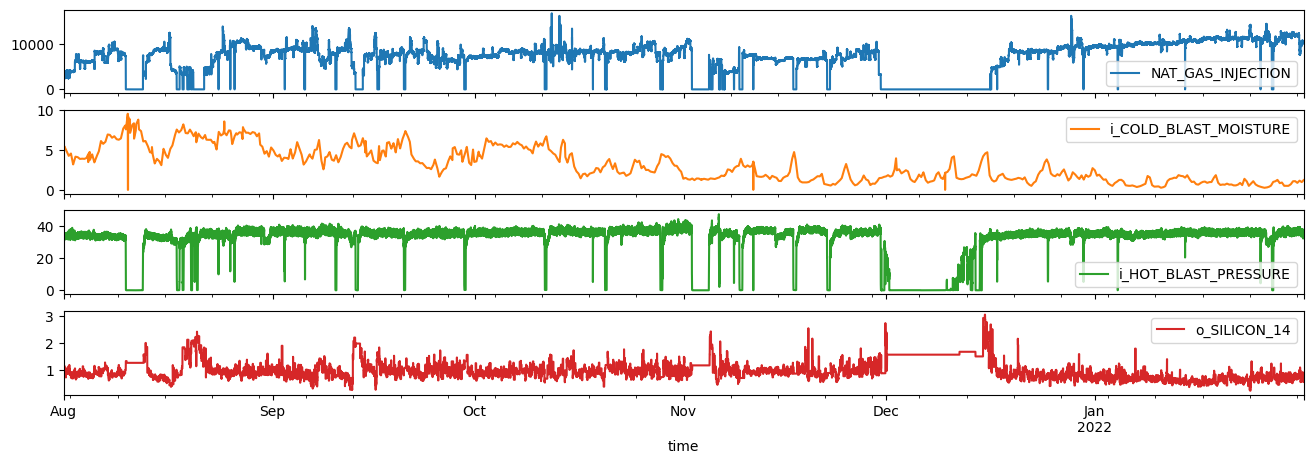

In [98]:

civs_df.plot( subplots=True, figsize=(16, 5)); plt.show()


In [101]:

civs_df.head()


,NAT_GAS_INJECTION,i_COLD_BLAST_MOISTURE,i_HOT_BLAST_PRESSURE,o_SILICON_14
time,,,,
2021-08-01 00:00:00,4034.234339,4.997585,34.357590,0.776
2021-08-01 00:01:00,4024.947376,5.000531,34.328821,0.776
2021-08-01 00:02:00,4011.601682,5.003476,34.300052,0.776
2021-08-01 00:03:00,4012.024633,5.006422,34.271282,0.776
2021-08-01 00:04:00,4000.467204,5.009368,34.242513,0.776


In [102]:

cond_deseason = ConditionalDeseasonalizer(sp=4)
detrend       = Detrender(forecaster=PolynomialTrendForecaster(degree=1))

for col in civs_df:
    civs_df[col] = cond_deseason.fit_transform( civs_df[col] )
    civs_df[col] = detrend.fit_transform(       civs_df[col] )


In [103]:

y    = civs_df['o_SILICON_14']
exog = civs_df.drop(columns=['o_SILICON_14'])


In [104]:

y


2021-08-01 00:00:00   -0.294798
2021-08-01 00:01:00   -0.294819
2021-08-01 00:02:00   -0.294818
2021-08-01 00:03:00   -0.294797
2021-08-01 00:04:00   -0.294795
                         ...   
2022-01-31 23:55:00   -0.336669
2022-01-31 23:56:00   -0.336667
2022-01-31 23:57:00   -0.336688
2022-01-31 23:58:00   -0.336688
2022-01-31 23:59:00   -0.336666
Freq: T, Name: o_SILICON_14, Length: 264960, dtype: float64

In [105]:

exog


,NAT_GAS_INJECTION,i_COLD_BLAST_MOISTURE,i_HOT_BLAST_PRESSURE
2021-08-01 00:00:00,-1736.504099,-1.155860,1.383468
2021-08-01 00:01:00,-1745.189088,-1.153030,1.351866
2021-08-01 00:02:00,-1758.500642,-1.149972,1.325765
2021-08-01 00:03:00,-1758.529088,-1.146921,1.295092
2021-08-01 00:04:00,-1770.305036,-1.143986,1.268418
...,...,...,...
2022-01-31 23:55:00,2218.768716,1.081689,4.666215
2022-01-31 23:56:00,2249.031477,1.082302,4.739346
2022-01-31 23:57:00,2232.704781,1.082808,4.819075
2022-01-31 23:58:00,2136.601461,1.083544,4.792663


In [106]:

len(civs_df)*0.1


26496.0

In [107]:

def split_data(df, test_split=0.15):
    n = int(len(df) * test_split)
    train, test = df[:-n], df[-n:]
    return train, test


In [142]:

test_size = 0.1

y_train, y_test       = split_data(y,    test_split=test_size)

exog_train, exog_test = split_data(exog, test_split=test_size)


In [143]:

regressors = [
    ("LinearRegression", make_reduction(LinearRegression())),
    ("RandomForest", make_reduction(RandomForestRegressor())),
    ("SupportVectorRegressor", make_reduction(SVR())),
    ("GradientBoosting", make_reduction(GradientBoostingRegressor()))
]


In [144]:

regressors2 = [
  
    ("RandomForest", make_reduction(RandomForestRegressor())),
    ("SupportVectorRegressor", make_reduction(SVR()))
  
]


In [145]:

regressors3 = [
  
    ("RandomForest", make_reduction(RandomForestRegressor()))

  
]


In [146]:

ensemble = EnsembleForecaster(regressors)
naive    = NaiveForecaster()


In [147]:

naive.fit(   y=y_train, X=exog_train)


NaiveForecaster()

In [148]:

ensemble.fit(y=y_train, X=exog_train)


EnsembleForecaster(forecasters=[('LinearRegression',
                                 RecursiveTabularRegressionForecaster(estimator=LinearRegression())),
                                ('RandomForest',
                                 RecursiveTabularRegressionForecaster(estimator=RandomForestRegressor())),
                                ('SupportVectorRegressor',
                                 RecursiveTabularRegressionForecaster(estimator=SVR())),
                                ('GradientBoosting',
                                 RecursiveTabularRegressionForecaster(estimator=GradientBoostingRegressor()))])

In [149]:
'''
fh = ForecastingHorizon(y_test.index, is_relative=None)

y_hat = pd.DataFrame(y_test).rename(columns={'unemp': 'test'})
'''

fh = ForecastingHorizon(y_test.index, is_relative=None)

y_hat = pd.DataFrame(y_test).rename(columns={'o_SILICON_14': 'test'})


In [150]:


y_hat['NaiveForecaster']    = naive.predict(   fh=fh, X=exog_test)


In [151]:

y_hat['EnsembleForecaster'] = ensemble.predict(fh=fh, X=exog_test)


/Users/user/opt/anaconda3/envs/py39_time_series/lib/python3.9/site-packages/sktime/forecasting/compose/_ensemble.py:367: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  y_pred = y_pred.groupby(level=1, axis=1).agg(


In [156]:

y_hat.rename(columns={'test':'y'}, inplace=True)


In [157]:

def evaluate(df, train, sort_by='MASE'):
    evals = pd.DataFrame(index=['sMAPE', 'MAPE', 'RMSE'])
    y_truth = df['y']
    y_predicted = df.drop(columns=['y'])
    for p in y_predicted:
        evals.loc['sMAPE', p] = mape(y_truth, y_predicted[p], symmetric=True)
        evals.loc['MAPE', p] = mape(y_truth, y_predicted[p], symmetric=False)
        evals.loc['RMSE', p] = np.sqrt(mse(y_truth, y_predicted[p]))
        evals.loc['MASE', p] = mase(y_truth, y_predicted[p], y_train=train)
    return evals.T.sort_values(by=sort_by)


In [172]:

evaluate(y_hat, y_test)


,sMAPE,MAPE,RMSE,MASE
NaiveForecaster,MeanAbsolutePercentageError(multilevel=2022-01...,MeanAbsolutePercentageError(multilevel=2022-01...,0.154714,42.866881
EnsembleForecaster,MeanAbsolutePercentageError(multilevel=2022-01...,MeanAbsolutePercentageError(multilevel=2022-01...,0.16841,43.327353


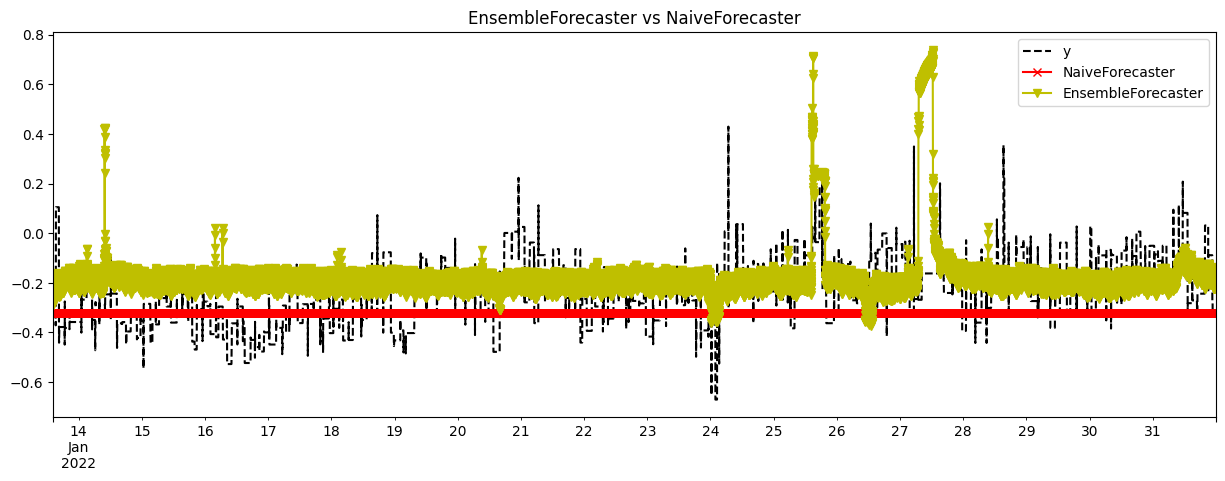

In [173]:

styles = ['k--','rx-','yv-']

for col, s in zip(y_hat, styles):
    y_hat[col].plot(style=s, label=col, figsize=(15, 5), 
                    title='EnsembleForecaster vs NaiveForecaster')
plt.legend()
#plt.savefig('../../../Packt-Time-Series-Cookbook/Chapters/Ch12/images/fig_12.18.png', bbox_inches='tight', dpi=600)


In [174]:

y_hat['EnsembleForecaster']


2022-01-13 14:24:00   -0.288572
2022-01-13 14:25:00   -0.288420
2022-01-13 14:26:00   -0.285859
2022-01-13 14:27:00   -0.272621
2022-01-13 14:28:00   -0.255448
                         ...   
2022-01-31 23:55:00   -0.209369
2022-01-31 23:56:00   -0.206107
2022-01-31 23:57:00   -0.198937
2022-01-31 23:58:00   -0.195797
2022-01-31 23:59:00   -0.189310
Freq: T, Name: EnsembleForecaster, Length: 26496, dtype: float64

In [175]:

ts_data


,i_COLD_BLAST_MOISTURE,NAT_GAS_INJECTION,i_HOT_BLAST_PRESSURE,o_SILICON_14
2021-08-01 00:00:00,4.997585,4034.234339,34.357590,0.776
2021-08-01 00:01:00,5.000531,4024.947376,34.328821,0.776
2021-08-01 00:02:00,5.003476,4011.601682,34.300052,0.776
2021-08-01 00:03:00,5.006422,4012.024633,34.271282,0.776
2021-08-01 00:04:00,5.009368,4000.467204,34.242513,0.776
...,...,...,...,...
2022-01-31 23:55:00,1.215443,10228.289380,35.796520,0.547
2022-01-31 23:56:00,1.216066,10258.770660,35.867555,0.547
2022-01-31 23:57:00,1.216689,10241.841990,35.950116,0.547
2022-01-31 23:58:00,1.217312,10145.704530,35.921036,0.547


In [176]:

y_test


2022-01-13 14:24:00   -0.322378
2022-01-13 14:25:00   -0.322399
2022-01-13 14:26:00   -0.322398
2022-01-13 14:27:00   -0.322377
2022-01-13 14:28:00   -0.322375
                         ...   
2022-01-31 23:55:00   -0.336669
2022-01-31 23:56:00   -0.336667
2022-01-31 23:57:00   -0.336688
2022-01-31 23:58:00   -0.336688
2022-01-31 23:59:00   -0.336666
Freq: T, Name: o_SILICON_14, Length: 26496, dtype: float64

In [177]:

exog_test


,NAT_GAS_INJECTION,i_COLD_BLAST_MOISTURE,i_HOT_BLAST_PRESSURE
2022-01-13 14:24:00,2668.680290,1.055759,5.958566
2022-01-13 14:25:00,2672.978034,1.055428,6.156198
2022-01-13 14:26:00,2711.131674,1.055327,6.009731
2022-01-13 14:27:00,2668.220987,1.055217,5.856779
2022-01-13 14:28:00,2604.066718,1.054993,5.815325
...,...,...,...
2022-01-31 23:55:00,2218.768716,1.081689,4.666215
2022-01-31 23:56:00,2249.031477,1.082302,4.739346
2022-01-31 23:57:00,2232.704781,1.082808,4.819075
2022-01-31 23:58:00,2136.601461,1.083544,4.792663


In [178]:

regressors


[('LinearRegression',
  RecursiveTabularRegressionForecaster(estimator=LinearRegression())),
 ('RandomForest',
  RecursiveTabularRegressionForecaster(estimator=RandomForestRegressor())),
 ('SupportVectorRegressor',
  RecursiveTabularRegressionForecaster(estimator=SVR())),
 ('GradientBoosting',
  RecursiveTabularRegressionForecaster(estimator=GradientBoostingRegressor()))]

In [179]:


from sktime.forecasting.compose import AutoEnsembleForecaster

auto = AutoEnsembleForecaster(forecasters=regressors,
                             method='feature-importance')
auto.fit(y=y_train, X=exog_train)


AutoEnsembleForecaster(forecasters=[('LinearRegression',
                                     RecursiveTabularRegressionForecaster(estimator=LinearRegression())),
                                    ('RandomForest',
                                     RecursiveTabularRegressionForecaster(estimator=RandomForestRegressor())),
                                    ('SupportVectorRegressor',
                                     RecursiveTabularRegressionForecaster(estimator=SVR())),
                                    ('GradientBoosting',
                                     RecursiveTabularRegressionForecaster(estimator=GradientBoostingRegressor()))])

In [180]:

auto.weights_


[0.9220739141989831,
 0.014693756303170432,
 0.05435053283176446,
 0.008881796666082045]

In [181]:

y_hat['AutoEnsembleForecaster'] = auto.predict(fh=fh, X=exog_test)


In [182]:

evaluate(y_hat, y_train)


,sMAPE,MAPE,RMSE,MASE
NaiveForecaster,MeanAbsolutePercentageError(multilevel=2022-01...,MeanAbsolutePercentageError(multilevel=2022-01...,0.154714,41.117605
EnsembleForecaster,MeanAbsolutePercentageError(multilevel=2022-01...,MeanAbsolutePercentageError(multilevel=2022-01...,0.16841,41.559287
AutoEnsembleForecaster,MeanAbsolutePercentageError(multilevel=2022-01...,MeanAbsolutePercentageError(multilevel=2022-01...,0.158318,43.053945
